
<h1 style="color:#183D3D"> Introduction:</h1>
<br> 
 <h4 style="color:#183D3D"> <a href="https://www.kiva.org/">Kiva.org  </a> is a nonprofit organization and an online lending platform that connects individuals and organizations around the world to provide financial support to entrepreneurs and small businesses in underserved and low-income communities. Founded in 2005, Kiva's mission is to alleviate poverty by enabling people to lend money to individuals or groups in need, typically in developing countries, to help them start or expand their businesses, improve their living conditions, and create opportunities for themselves and their families.
</h4>
<br> 
<br>

![](http://images.ctfassets.net/j0p9a6ql0rn7/4Sx8DdcJVtiVDkhqeG4ji0/7cabc7e95ba392b17d1e19614d151b5b/Kiva-partnership-hero.png?w=1000&h=784&fit=scale&f=center&fm=webp&q=65) 

<h1 style="color:#183D3D"> Problem Statment :</h1>
<br>

<h3 style="color:#183D3D"> 
    
>"Kiva.org wants to consider a new loans partner in one of the Philippine states,,  Which state currently has no loans partner in the Philippines?"
</h3> 




<h1 style="color:#183D3D"> Methodology:</h1>
<br>

<h4 style="color:#183D3D"> 
    
> "Finding the Philippine states by conducting geospatial analysis for the Philippine states and the Kiva loans related to the Philippines."
</h4> 




<h4 style="color:#183D3D">  Importing Libraries </h4> 

In [69]:
import geopandas as gpd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
plt.style.use("ggplot")


<h4 style="color:#183D3D">  Load And Read Kiva Wrold loans Dataset  </h4>  

In [2]:
file_path= "/kaggle/input/geospatial-learn-course-data/kiva_loans/kiva_loans"
world_loans =gpd.read_file(file_path)

<h4 style="color:#183D3D">  EDA (Explore The Data set )   </h4>  

In [3]:
#show the first 5 rows of the dataset 
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


<h4 style="color:#183D3D">"The World_loans dataset contains data related to loans partnered by Kiva organizations all over the world."

</h4>  

<Axes: xlabel='ID', ylabel='amount'>

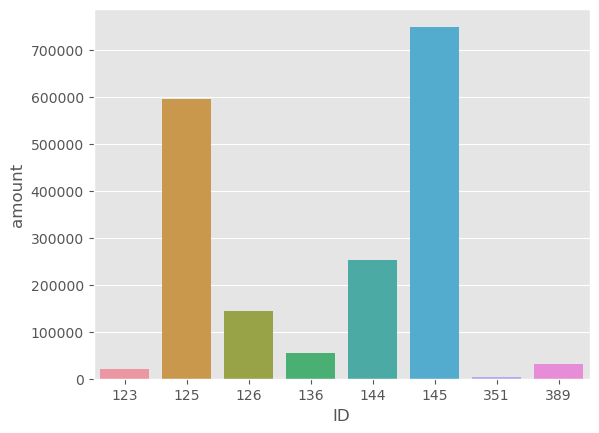

In [153]:
import seaborn as sns 
#world_loans.query('country=="Philippines"').groupby("Partner ID").amount.sum().plot(kind="bar" )
import pandas as pd 
phl_loans_data = world_loans.query(' country== "Philippines"')
phl_partner = phl_loans_data.groupby("Partner ID").amount.max() 
phl_partner 
partner_id= world_loans.query(' country== "Philippines"')['Partner ID'].unique()
partner_id
df = pd.DataFrame({"ID"  : partner_id , "amount" :phl_partner}  )
sns.barplot(df, x="ID" , y="amount" )


# countries = pd.DataFrame({"Country" : ['Philippines' ] , "sum_amount" :[phl_loans_sum ]} ) 
# countries

# fig = px.bar(countries , x="Country" , y="sum_amount")
# fig.show()


In [4]:
#the type of world_loans is a GeoDataFrame 
type(world_loans)

geopandas.geodataframe.GeoDataFrame

<h5 style="color:#183D3D"> Show The Data Type for each column in the dataset 
</h5>  

In [5]:
world_loans.dtypes

Partner ID       int64
Field Part      object
sector          object
Loan Theme      object
country         object
amount           int64
geometry      geometry
dtype: object

In [6]:
world_loans.isna().sum()

Partner ID    0
Field Part    0
sector        0
Loan Theme    0
country       0
amount        0
geometry      0
dtype: int64

<h4 style="color:#183D3D"> show numbers of rows and columns in the dataset  
</h4>  

In [7]:
world_loans.shape

(13662, 7)

In [8]:

world_filepath = gpd.datasets.get_path('naturalearth_lowres')# polygon data for the counttries boundary all over the world 
world = gpd.read_file(world_filepath)
world.head()

/tmp/ipykernel_32/878419104.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')# polygon data for the counttries boundary all over the world


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<h4 style="color:#183D3D"> Ploting the loaction of kiva partner all over the world 
</h4>  

<Axes: >

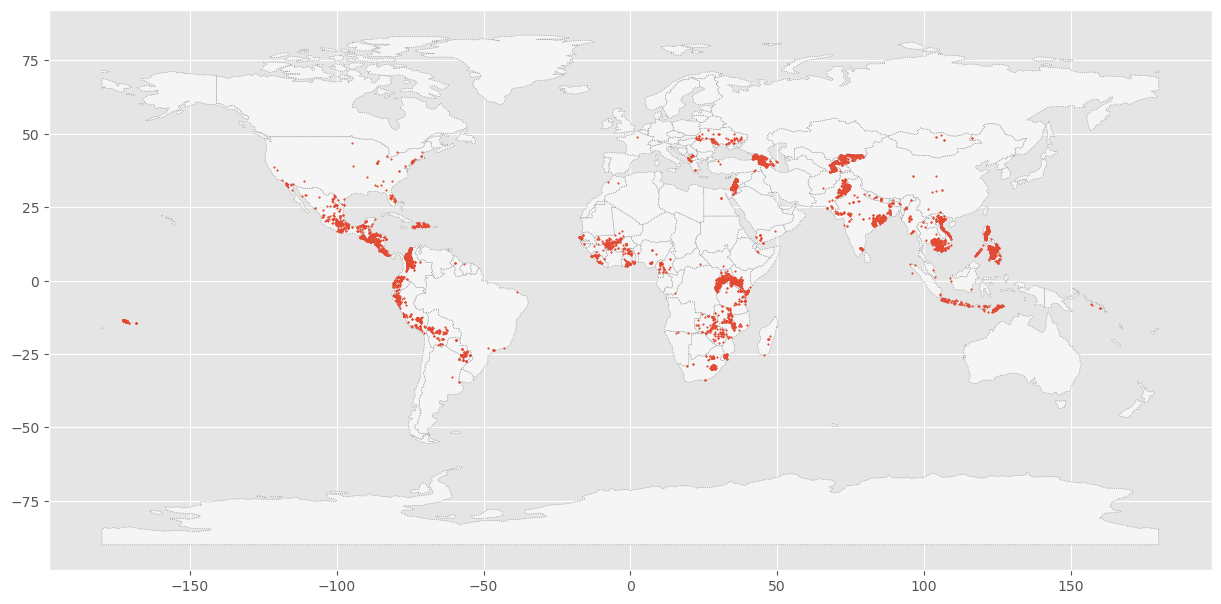

In [9]:
ax= world.plot(figsize=(15,20) ,color='whitesmoke', linestyle=':', edgecolor='grey' )
world_loans.plot(ax=ax, markersize=1)

<Axes: >

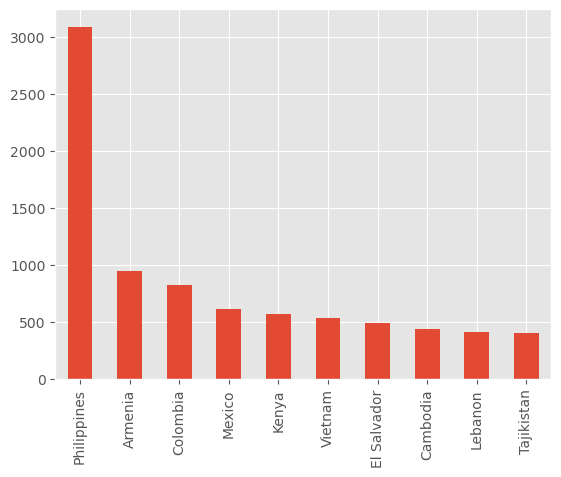

In [10]:
world_loans['country'].value_counts().head(10).plot(kind="bar")

<h4 style="color:#183D3D"> Obtain only the loans and geometry data that are related for Phillipine from the kiva world_loan data 
</h4>  

In [11]:
PHL_loans = world_loans[(world_loans.country=="Philippines")].copy()
PHL_loans = PHL_loans[['country' , 'geometry']] #select the country name and the geometry data for each state 
PHL_loans

,country,geometry
2859,Philippines,POINT (121.73961 17.64228)
2860,Philippines,POINT (121.74169 17.63235)
2861,Philippines,POINT (121.46667 16.60000)
2862,Philippines,POINT (121.73333 17.83333)
2863,Philippines,POINT (121.51800 16.72368)
...,...,...
12376,Philippines,POINT (120.83841 14.35197)
12377,Philippines,POINT (120.83841 14.35197)
12378,Philippines,POINT (120.96597 14.62057)
12379,Philippines,POINT (120.96597 14.62057)


<h4 style="color:#183D3D">"Obtain the geospatial data for the boundaries of the Philippines." 
</h4>  

In [12]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("../input/geospatial-learn-course-data/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


<Axes: >

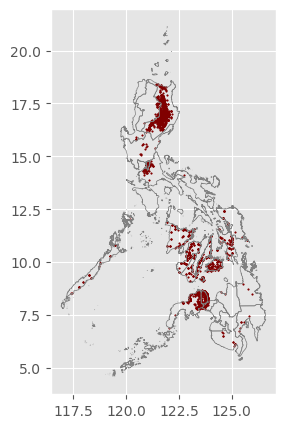

In [13]:
ax = PHL.plot(figsize=(15,5), color='none', edgecolor='gray', zorder=3)

PHL_loans.plot(color='maroon', markersize=1, ax=ax)


Compare  the plotted map with the labelled  map of phillipine to find the name of state where there is no loans partner  there  [phillipine labelled map](https://upload.wikimedia.org/wikipedia/commons/f/f6/Labelled_map_of_the_Philippines_-_Provinces_and_Regions.png) 


Mindoro  State Have no partner at all ,even it's consider as a big state . it will be a good decision for kiva to consider a new partner there 